<h1>Import libraries<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from scipy.stats import norm
from scipy import stats
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h2>Reading CSV File & drop duplicates<h2>

In [3]:
# Read the data
apps_with_duplicates = pd.read_csv('apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
apps.sample(5)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6529,7585,CN Superstar Soccer: Goal!!!,FAMILY,4.1,3863,41.0,"100,000+",Paid,$2.99,Everyone,Sports;Action & Adventure,"May 24, 2018",1.1.1,4.1 and up
8072,9192,Mental Hospital:EB 2 Lite,GAME,4.1,5341,8.8,"100,000+",Free,0,Teen,Action,"April 30, 2014",1,4.0 and up
5345,6353,24 megapixel hd camera,PHOTOGRAPHY,4.0,802,5.1,"100,000+",Free,0,Everyone,Photography,"May 3, 2017",1.1,2.3 and up
8808,9963,EV Finder,TOOLS,4.3,29,23.0,"1,000+",Free,0,Everyone,Tools,"February 7, 2017",2.7,2.3 and up
5916,6952,BX Thailand - Crypto Tracking & Analyse Bitcoin,FINANCE,NaN,2,34.0,100+,Free,0,Everyone,Finance,"March 10, 2018",1.7,4.0.3 and up


<h2>Data cleaning<h2>

In [4]:
#missing data
total = apps.isnull().sum().sort_values(ascending=False)
percent = (apps.isnull().sum()/apps.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151465
Size,1227,0.127032
Current Ver,8,0.000828
Android Ver,2,0.000207
App,0,0.000000
Unnamed: 0,0,0.000000


In [5]:
apps.Installs = apps.Installs.replace("Free", 0)
apps.dropna(how='any', inplace=True)
apps.Installs = apps.Installs.astype(str)
apps.Installs = apps.Installs.apply(lambda x: x.replace(',', ''))
apps.Installs = apps.Installs.apply(lambda x: x.replace('+', ''))
apps.Installs = apps.Installs.apply(lambda x: int(x))
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Replace 'Varies with device' with NaN in the Size column
apps['Size'].replace('Varies with device', np.nan, inplace=True)

# Ensure the Size column is treated as strings
apps['Size'] = apps['Size'].astype(str)

# Convert Size to numeric values (in MB)
apps.Size = (apps.Size.replace(r'[kM]+$', '', regex=True).astype(float) *
             apps.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
             .fillna(1)
             .replace(['k','M'], [10**3, 10**6]).astype(int))
apps.Size = apps.Size.apply(lambda x: x/(10**6))

# Rename the Size column to Size(in MB)
apps.rename(columns={'Size': 'Size(in MB)'}, inplace=True)

apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size(in MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0.000019,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,0.000014,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.000009,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0.000025,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.000003,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
apps.Category = apps.Category.apply(lambda x: x.replace('_',' '))
apps.Price = apps.Price.apply(lambda x: x.replace('$',''))
apps.rename(columns={'Price': 'Price(in $)'}, inplace=True)
apps.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size(in MB),Installs,Type,Price(in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,0.000019,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART AND DESIGN,3.9,967,0.000014,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,0.000009,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,0.000025,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,0.000003,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART AND DESIGN,4.4,167,0.000006,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART AND DESIGN,3.8,178,0.000019,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART AND DESIGN,4.1,36815,0.000029,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART AND DESIGN,4.4,13791,0.000033,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART AND DESIGN,4.7,121,0.000003,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


<h2>Exploring app categories<h2>

Number of categories =  33


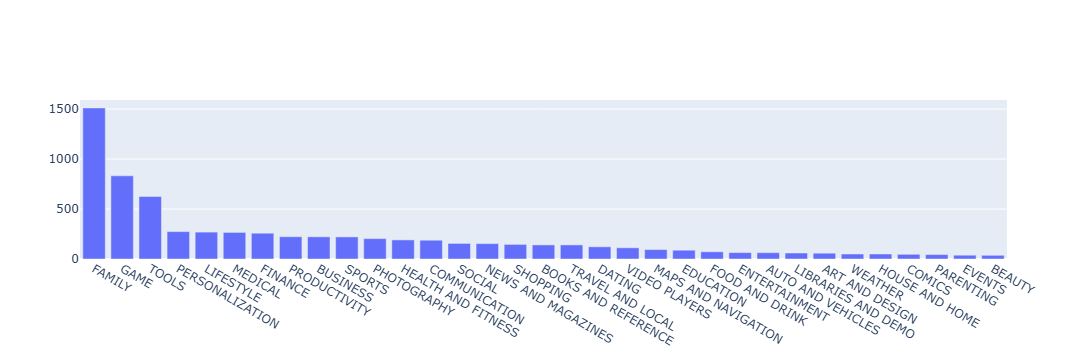

In [8]:
# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
# Number of categories =  33

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts()
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

<h2>Distribution of app ratings<h2>

Average app rating =  4.160703603475289


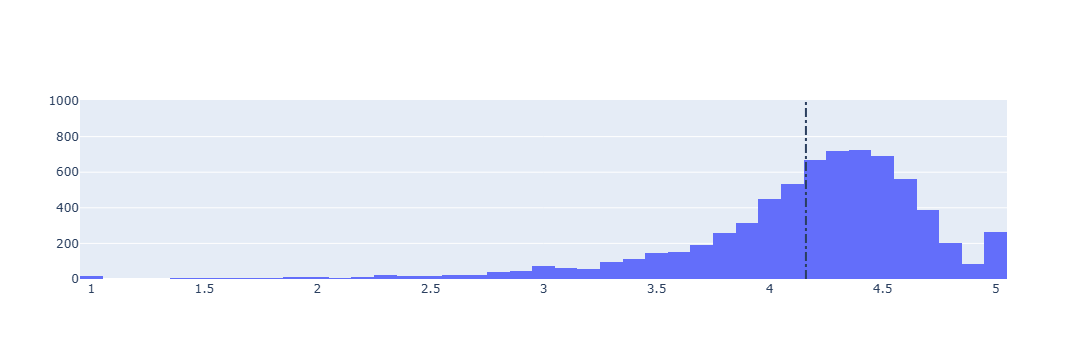

In [9]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

<h2>Size and price of an app<h2>

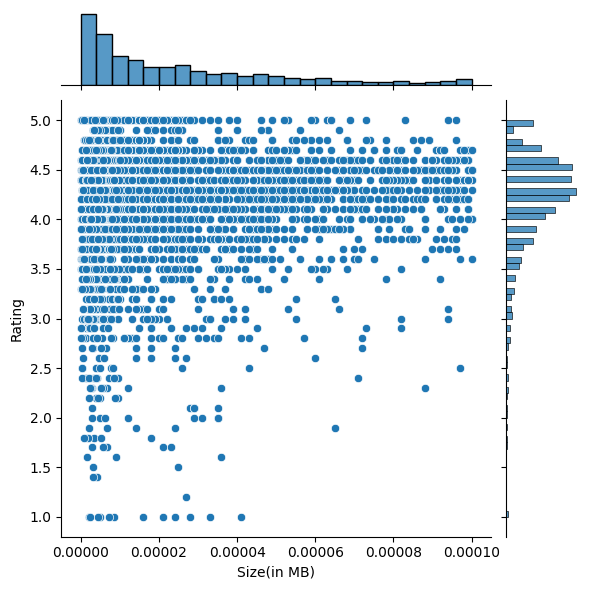

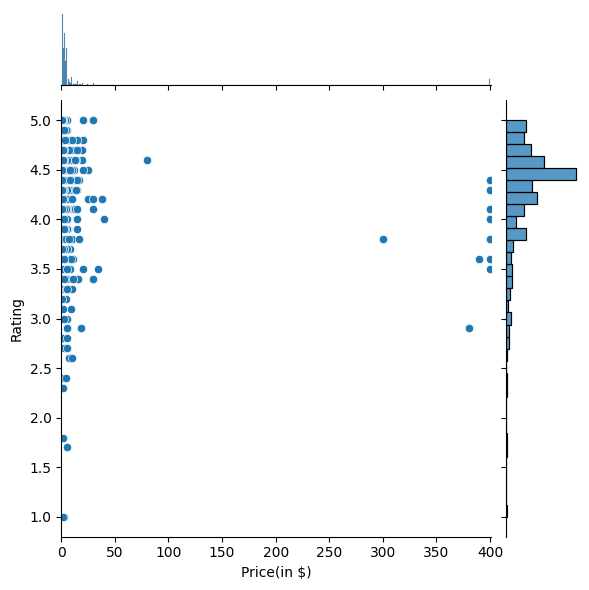

In [10]:
# Replace zero installs with 1 for log transformation
apps['Installs'] = apps['Installs'].replace(0, 1)
apps['Installs'] = apps['Installs'] + 1  # Shift data slightly to avoid clustering around 0

# Ensure 'Installs' column is numeric
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

# Handle missing values
apps = apps.dropna(subset=['Installs'])

# Check if 'Size' column exists and replace 'Varies with device' with NaN
if 'Size' in apps.columns:
    apps['Size'].replace('Varies with device', np.nan, inplace=True)

    # Ensure the Size column is treated as strings
    apps['Size'] = apps['Size'].astype(str)

    # Convert Size to numeric values (in MB)
    apps.Size = (apps.Size.replace(r'[kM]+$', '', regex=True).astype(float) *
                 apps.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
                 .fillna(1)
                 .replace(['k','M'], [10**3, 10**6]).astype(int))
    apps.Size = apps.Size.apply(lambda x: x/(10**6))

    # Rename the Size column to Size(in MB)
    apps.rename(columns={'Size': 'Size(in MB)'}, inplace=True)

# Check if 'Category' column exists and replace underscores with spaces
if 'Category' in apps.columns:
    apps.Category = apps.Category.apply(lambda x: x.replace('_', ' '))

# Check if 'Price' column exists and remove dollar signs
if 'Price' in apps.columns:
    apps.Price = apps.Price.apply(lambda x: x.replace('$', ''))
    apps.rename(columns={'Price': 'Price(in $)'}, inplace=True)

# Select rows where both 'Rating' and 'Size' values are not null
if 'Size(in MB)' in apps.columns:
    apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size(in MB)'].isnull())]

    # Subset for categories with at least 250 apps
    large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

    # Plot size vs. rating
    plt1 = sns.jointplot(x=large_categories['Size(in MB)'], y=large_categories['Rating'])

    # Select apps whose 'Type' is 'Paid'
    paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

    # Convert Price to numeric values for plotting
    paid_apps['Price(in $)'] = pd.to_numeric(paid_apps['Price(in $)'], errors='coerce')

    # Plot price vs. rating with improved scale on the x-axis
    plt2 = sns.jointplot(x=paid_apps['Price(in $)'], y=paid_apps['Rating'])
    
    # Set x-axis limits to improve readability
    plt2.ax_joint.set_xlim(0, paid_apps['Price(in $)'].max() + 1)

    plt.show()
else:
    print("The 'Size' column does not exist in the DataFrame.")

<h2>Relation between category and app price<h2>

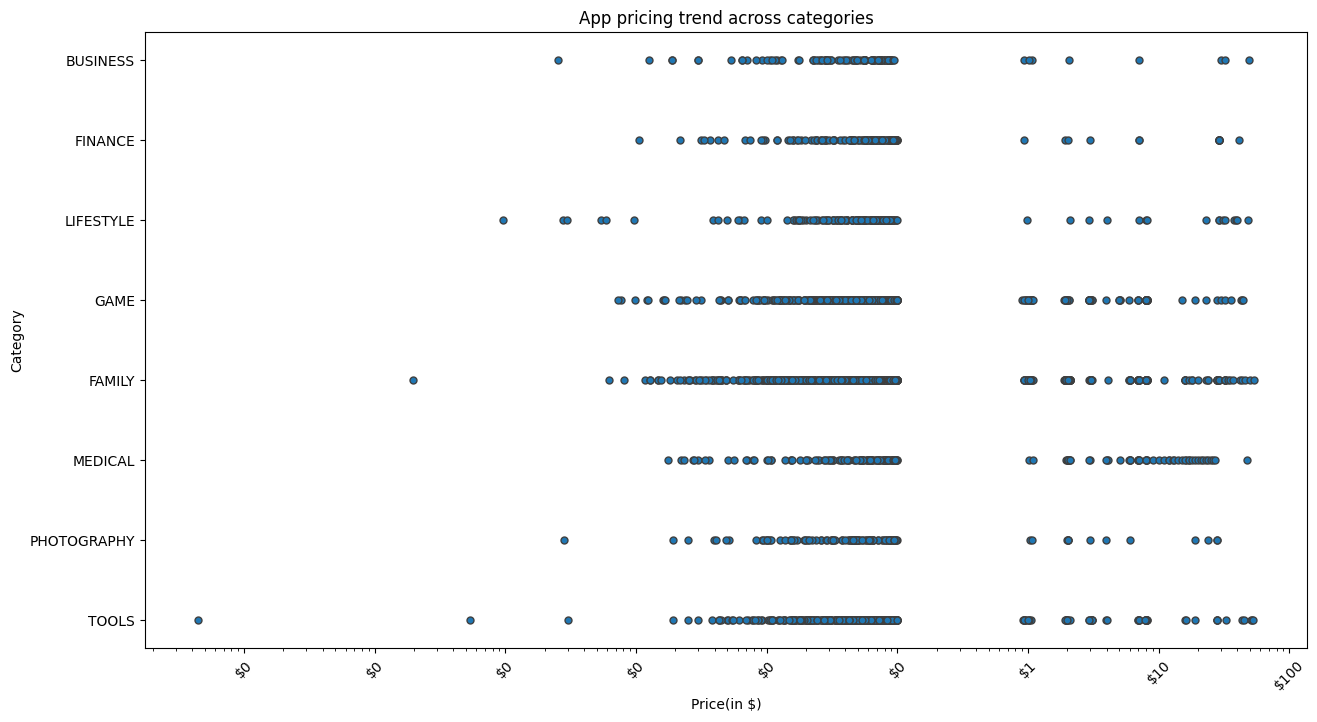

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend
ax = sns.stripplot(x = popular_app_cats['Price(in $)'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Set a logarithmic scale, to make x_axis more readable
ax.set_xscale('log')

# Format the x-axis labels
def currency(x, pos):
    return '${:,.0f}'.format(x)

ax.xaxis.set_major_formatter(FuncFormatter(currency))

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

<h1>NOTE about the follwing cell output<h1>
<p><h3>There have indeed been real "I'm Rich" apps in the past,
but they were often pranks or novelty items. Many have been removed from Google app store.<h3></p>

In [12]:
# Convert 'Price(in $)' to numeric
popular_app_cats['Price'] = pd.to_numeric(popular_app_cats['Price(in $)'], errors='coerce')

# Handle missing values
popular_app_cats['Price'].fillna(0, inplace=True)

# Filter data
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


<h2>Filter out "junk" apps<h2>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

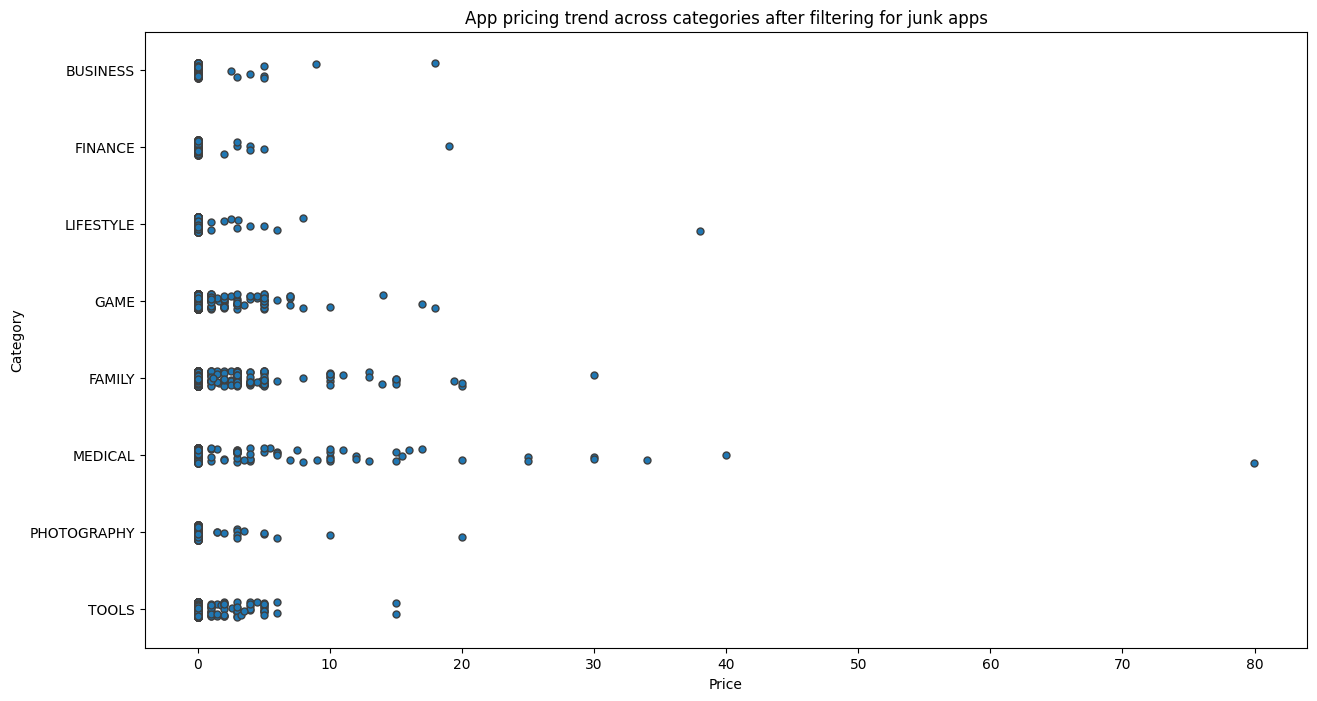

In [13]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category
ax = sns.stripplot(x=apps_under_100["Price"], y=apps_under_100["Category"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

<h2>Popularity of paid apps vs free apps<h2>

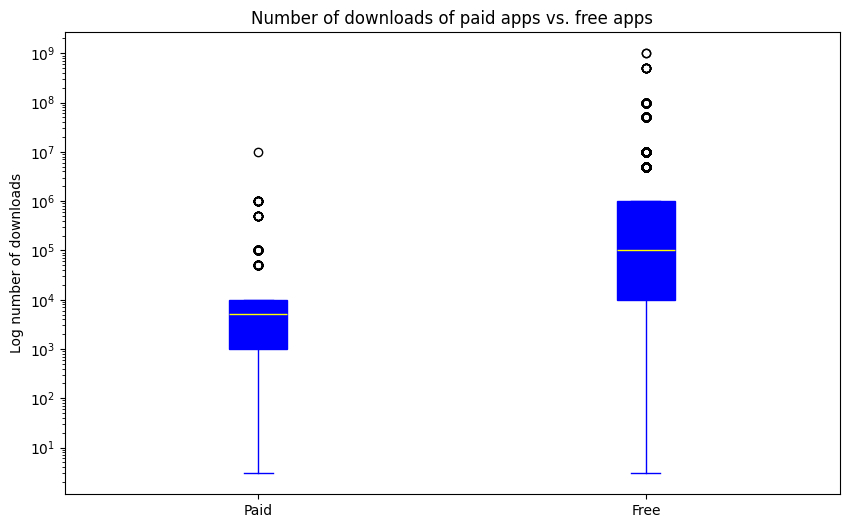

In [14]:
# Replace zero installs with 1 for log transformation
apps['Installs'] = apps['Installs'].replace(0, 1)
apps['Installs'] = apps['Installs'] + 1  # Shift data slightly to avoid clustering around 0

# Ensure 'Installs' column is numeric
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

# Handle missing values
apps = apps.dropna(subset=['Installs'])

# Data for paid and free apps
paid_installs = apps[apps['Type'] == 'Paid']['Installs']
free_installs = apps[apps['Type'] == 'Free']['Installs']

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([paid_installs, free_installs], labels=['Paid', 'Free'], patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            medianprops=dict(color='yellow'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

plt.yscale('log')
plt.title('Number of downloads of paid apps vs. free apps')
plt.ylabel('Log number of downloads')
plt.show()

<h2>Number of Free Apps vs Paid Apps<h2>

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

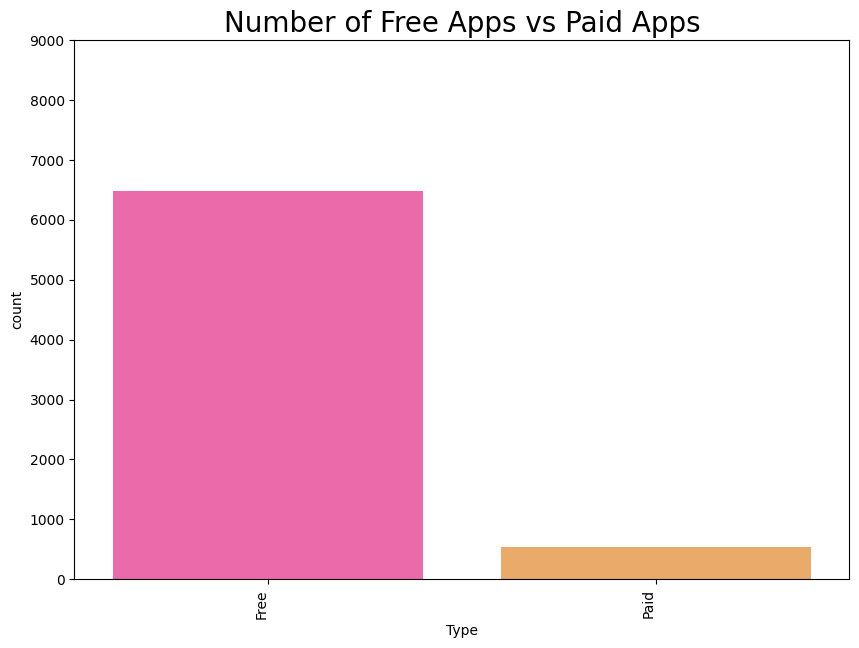

In [15]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=apps, palette = "spring")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
arrayss=list(range(10))
nums = np.array(arrayss) *1000
nums.tolist()
plt.yticks(nums)
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)

<h2>Top Categories for Free Apps<h2>

Text(0.5, 1.0, 'Top Categories for Free Apps')

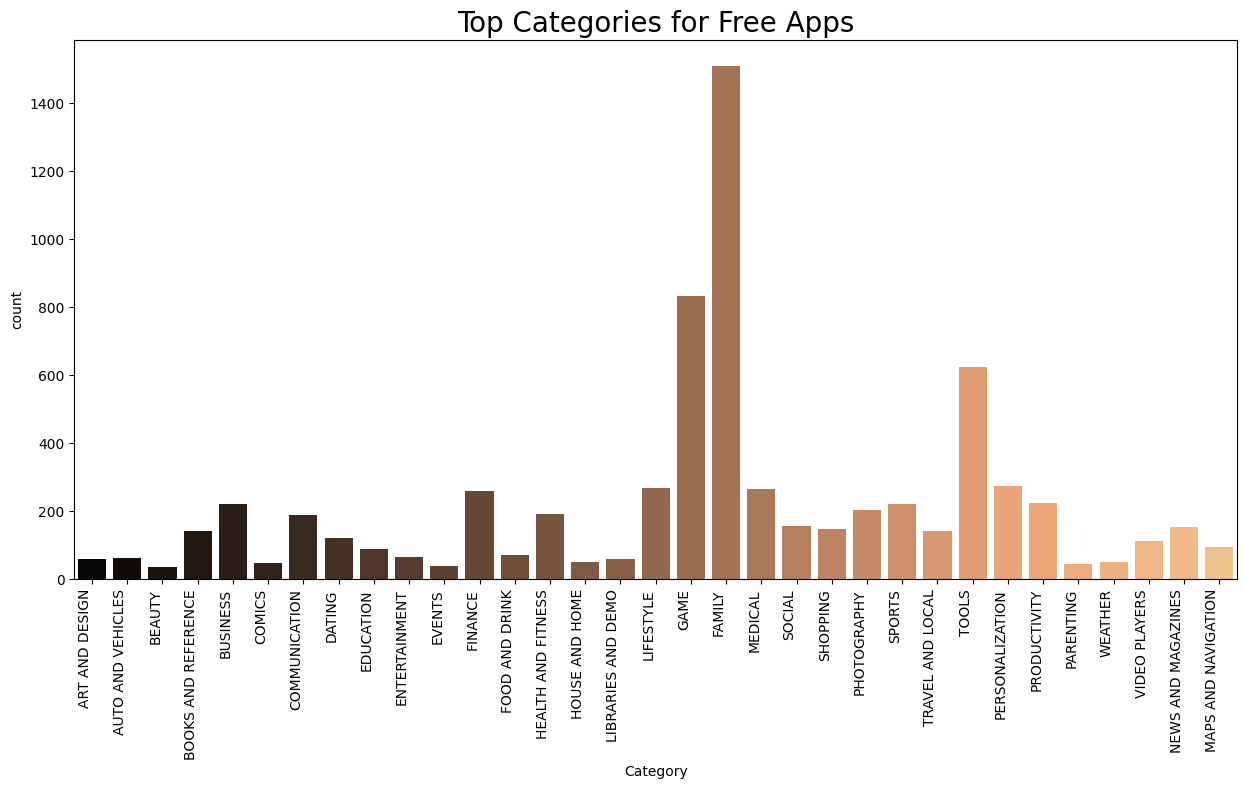

In [16]:
rcParams['figure.figsize'] = 15,7
free_categories = sns.countplot(x="Category",data=apps, palette = "copper")
free_categories.set_xticklabels(free_categories.get_xticklabels(), rotation=90, ha="right")
free_categories 
plt.title('Top Categories for Free Apps',size = 20)

<h2>Sentiment analysis of user reviews<h2>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

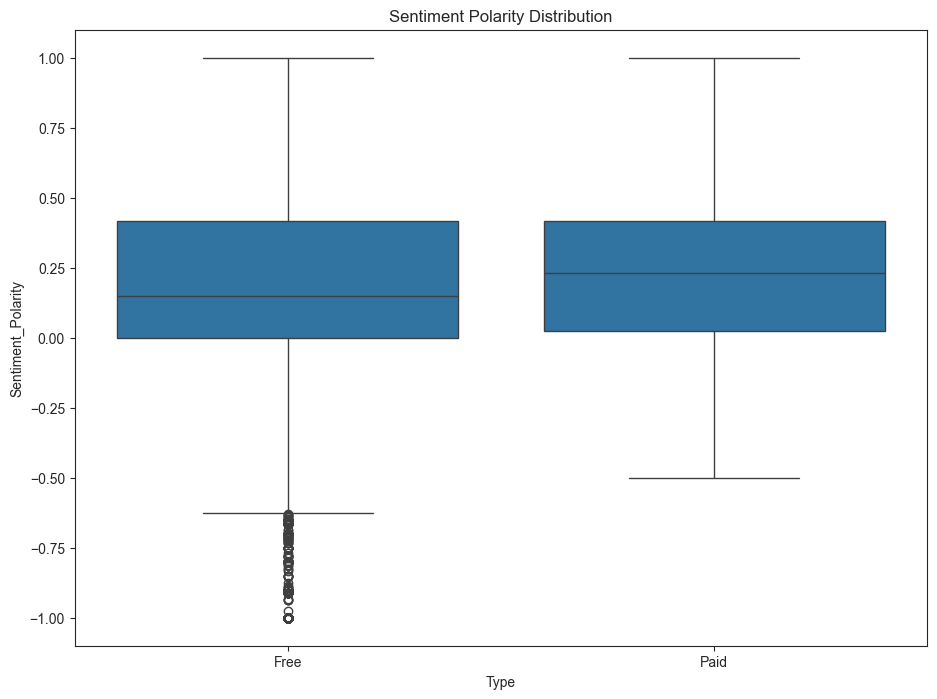

In [17]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps,reviews_df,on='App',how='inner')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')